In [1]:
import os
import pandas as pd
from pandas import json_normalize
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Function to read data from text (CSV) files
def read_data(file_name):
    df = pd.read_csv(file_name, names=['data_id', 'accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension', 'timestamp'], dtype=str)
    df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
    df[['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']] = df[['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']].apply(pd.to_numeric, errors='coerce')
    df['tension'] = 0.650 * (df['tension'] - 2166)
    return df

def establish_printing_start(file_name):
    df = pd.read_json(file_name, lines=True)
    df = json_normalize(df.to_dict('records'))
    return df[df.status == 'P'].head(1)['timestamp'].values[0]

# Add Label Encoder
label_encoder = LabelEncoder()

def process_and_label_data(base_dir):
    categories = ['arm_failure', 'bowden', 'plastic', 'proper', 'retraction_05', 'unstick']
    all_data = []

    for category in categories:
        print(f"Processing category: {category}")
        txt_file = os.path.join(base_dir, category, 't.txt')
        json_file = os.path.join(base_dir, category, 'j.json')

        df = read_data(txt_file)
        start_time = establish_printing_start(json_file)
        df = df[df.time > start_time]
        
        # Add category label
        df['label'] = category

        all_data.append(df)

    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

def zscore_normalize_data(df, columns):
    for column in columns:
        df[column] = df[column].astype(float)
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df

# Function to plot raw data
def plot_raw_data(df, features, categories):
    for category in categories:
        category_data = df[df['label'] == category]
        category_data_interpolated = category_data.copy().interpolate(method='linear')
        for feature in features:
            plt.figure(figsize=(15, 5))

            # Plot raw and interpolated data together
            plt.plot(category_data['time'], category_data[feature], label='Raw Data', alpha=0.6)
            plt.plot(category_data_interpolated['time'], category_data_interpolated[feature], label='Interpolated Data', alpha=0.6)
            plt.title(f'Raw vs Interpolated Data for Category: {category}, Feature: {feature}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()
            plt.show()


# Function to plot raw data
def plot_Normalized_data(df, features, categories):
    for category in categories:
        category_data = df[df['label'] == category]
        for feature in features:
            plt.figure(figsize=(15, 5))
            plt.plot(category_data['time'], category_data[feature])
            plt.title(f'Normalized Data for Category: {category}, Feature: {feature}')
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.show()

In [3]:
# Call the function to process and label the data
base_directory = r'C:\MyFiles\AI\UNI\ML-DP-AI\Project\dataset\WithBase'
all_data = process_and_label_data(base_directory)
Raw_data = all_data.copy()

categories = ['arm_failure', 'bowden', 'plastic', 'proper', 'retraction_05', 'unstick']

Processing category: arm_failure


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: bowden


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: plastic


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: proper


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: retraction_05


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


Processing category: unstick


C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\421508846.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['time'] = pd.to_datetime(df['timestamp'], unit='ms')


In [4]:
# Handle missing values using interpolation
all_data_int = all_data.interpolate(method='linear')

C:\Users\M.lotfi\AppData\Local\Temp\ipykernel_15336\4242618276.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_data_int = all_data.interpolate(method='linear')


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ['accel0X', 'accel0Y', 'accel0Z', 'accel1X', 'accel1Y', 'accel1Z', 'tension']
X = all_data_int[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
pca = PCA(n_components=len(features))  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled)


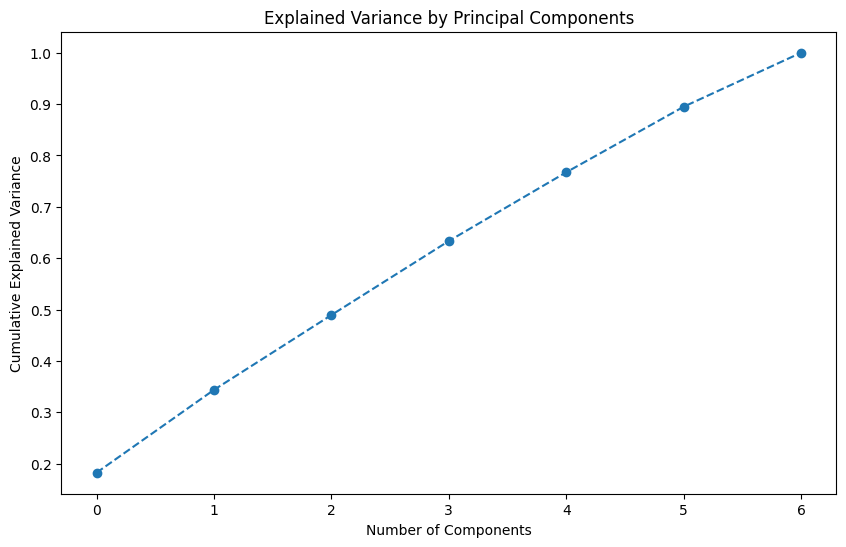

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


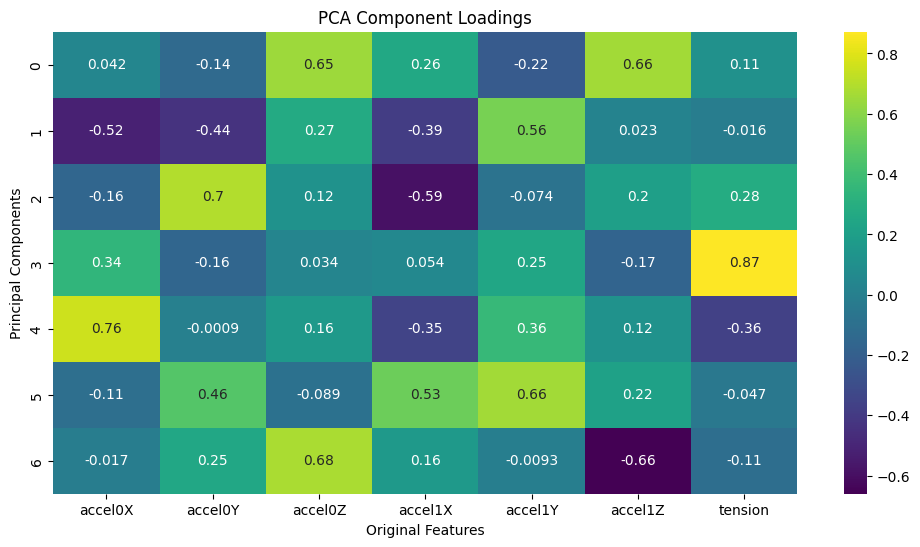

In [19]:
pca_components = pd.DataFrame(pca.components_, columns=features)

# Plotting PCA components
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, annot=True, cmap='viridis')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('PCA Component Loadings')
plt.show()
